In [1]:
"""
Author:
    Wenhan Tan
Date:
    2021/9

Description:
    This python notebook runs on kaggle kernel to test a script
    (Output_quadratic_kappa.py) and is only here for GitHub backup purposes.
"""

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import trange
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/masterthesisresearch/test_slideFolders_classification.csv
/kaggle/input/masterthesisresearch/validation_slideFolders_classification.csv
/kaggle/input/masterthesisresearch/train_slideFolders_classification.csv


In [ ]:
def quadratic_kappa(actuals, preds, N=4):
    """This function calculates the Quadratic Kappa Metric used for Evaluation in the PetFinder competition
    at Kaggle. It returns the Quadratic Weighted Kappa metric score between the actual and the predicted values 
    of adoption rating."""
    w = np.zeros((N,N))
    O = confusion_matrix(actuals, preds)
    for i in range(len(w)): 
        for j in range(len(w)):
            w[i][j] = float(((i-j)**2)/(N-1)**2)
    
    act_hist=np.zeros([N])
    for item in actuals: 
        act_hist[item]+=1
    
    pred_hist=np.zeros([N])
    for item in preds: 
        pred_hist[item]+=1
                         
    E = np.outer(act_hist, pred_hist)
    E = E/E.sum()
    O = O/O.sum()
    
    num=0
    den=0
    for i in range(len(w)):
        for j in range(len(w)):
            num+=w[i][j]*O[i][j]
            den+=w[i][j]*E[i][j]
    return (1 - (num/den))

In [2]:
"""
Find row length
"""
train_row_length = len(np.genfromtxt("/kaggle/input/masterthesisresearch/train_slideFolders_classification.csv", delimiter=",", usecols=1))
test_row_length = len(np.genfromtxt("/kaggle/input/masterthesisresearch/test_slideFolders_classification.csv", delimiter=",", usecols=1))
validation_row_length = len(np.genfromtxt("/kaggle/input/masterthesisresearch/validation_slideFolders_classification.csv", delimiter=",", usecols=1))

In [3]:
"""
Read in train data
"""
train_DF_data = []
train_DF_magnitude = []
train_MC_data = []
train_MC_magnitude = []
train_y = []

for i in trange(train_row_length):
    train_slideFolders_classification = np.genfromtxt("/kaggle/input/masterthesisresearch/train_slideFolders_classification.csv", delimiter=",", skip_header=i, max_rows=1, dtype=np.str)
    train_slideFolders_classification = train_slideFolders_classification[train_slideFolders_classification != '']
    
    train_DF_data.append(train_slideFolders_classification[:int((len(train_slideFolders_classification) - 1)/2/2)].astype(float))
    train_DF_magnitude.append(train_slideFolders_classification[int((len(train_slideFolders_classification) - 1)/2/2):int((len(train_slideFolders_classification) - 1)/2)].astype(float))
    train_MC_data.append(train_slideFolders_classification[int((len(train_slideFolders_classification) - 1)/2):int((len(train_slideFolders_classification) - 1)/2 + (len(train_slideFolders_classification) - 1)/2/2)].astype(float))
    train_MC_magnitude.append(train_slideFolders_classification[int((len(train_slideFolders_classification) - 1)/2 + (len(train_slideFolders_classification) - 1)/2/2):len(train_slideFolders_classification)-1].astype(float))
    train_y.append(train_slideFolders_classification[-1].tolist())

100%|██████████| 2358/2358 [06:57<00:00,  5.64it/s]


In [4]:
"""
Read in test data
"""
test_DF_data = []
test_DF_magnitude = []
test_MC_data = []
test_MC_magnitude = []
test_y = []

for i in trange(test_row_length):
    test_slideFolders_classification = np.genfromtxt("/kaggle/input/masterthesisresearch/test_slideFolders_classification.csv", delimiter=",", skip_header=i, max_rows=1, dtype=np.str)
    test_slideFolders_classification = test_slideFolders_classification[test_slideFolders_classification != '']
    
    test_DF_data.append(test_slideFolders_classification[:int((len(test_slideFolders_classification) - 1)/2/2)].astype(float))
    test_DF_magnitude.append(test_slideFolders_classification[int((len(test_slideFolders_classification) - 1)/2/2):int((len(test_slideFolders_classification) - 1)/2)].astype(float))
    test_MC_data.append(test_slideFolders_classification[int((len(test_slideFolders_classification) - 1)/2):int((len(test_slideFolders_classification) - 1)/2 + (len(test_slideFolders_classification) - 1)/2/2)].astype(float))
    test_MC_magnitude.append(test_slideFolders_classification[int((len(test_slideFolders_classification) - 1)/2 + (len(test_slideFolders_classification) - 1)/2/2):len(test_slideFolders_classification)-1].astype(float))
    test_y.append(test_slideFolders_classification[-1].tolist())

100%|██████████| 1262/1262 [06:37<00:00,  3.17it/s]


In [5]:
"""
Read in validation data
"""
validation_DF_data = []
validation_DF_magnitude = []
validation_MC_data = []
validation_MC_magnitude = []
validation_y = []

for i in trange(validation_row_length):
    validation_slideFolders_classification = np.genfromtxt("/kaggle/input/masterthesisresearch/validation_slideFolders_classification.csv", delimiter=",", skip_header=i, max_rows=1, dtype=np.str)
    validation_slideFolders_classification = validation_slideFolders_classification[validation_slideFolders_classification != '']
    
    validation_DF_data.append(validation_slideFolders_classification[:int((len(validation_slideFolders_classification) - 1)/2/2)].astype(float))
    validation_DF_magnitude.append(validation_slideFolders_classification[int((len(validation_slideFolders_classification) - 1)/2/2):int((len(validation_slideFolders_classification) - 1)/2)].astype(float))
    validation_MC_data.append(validation_slideFolders_classification[int((len(validation_slideFolders_classification) - 1)/2):int((len(validation_slideFolders_classification) - 1)/2 + (len(validation_slideFolders_classification) - 1)/2/2)].astype(float))
    validation_MC_magnitude.append(validation_slideFolders_classification[int((len(validation_slideFolders_classification) - 1)/2 + (len(validation_slideFolders_classification) - 1)/2/2):len(validation_slideFolders_classification)-1].astype(float))
    validation_y.append(validation_slideFolders_classification[-1].tolist())

100%|██████████| 589/589 [01:13<00:00,  8.00it/s]


In [6]:
"""
Construct decision flow data
"""
train_DF_x = []
for tmp_idx in trange(len(train_y)):
    tmp_1 = train_DF_magnitude[tmp_idx][train_DF_data[tmp_idx] == 1].sum()
    tmp_2 = train_DF_magnitude[tmp_idx][train_DF_data[tmp_idx] == 2].sum()
    tmp_3 = train_DF_magnitude[tmp_idx][train_DF_data[tmp_idx] == 3].sum()
    tmp_4 = train_DF_magnitude[tmp_idx][train_DF_data[tmp_idx] == 4].sum()
    tmp_5 = train_DF_magnitude[tmp_idx][train_DF_data[tmp_idx] == 5].sum()
    sumOfMagnitude = tmp_1 + tmp_2 + tmp_3 + tmp_4 + tmp_5
    train_DF_x.append([tmp_1, tmp_2, tmp_3, tmp_4, tmp_5] / sumOfMagnitude)

test_DF_x = []
for tmp_idx in trange(len(test_y)):
    tmp_1 = test_DF_magnitude[tmp_idx][test_DF_data[tmp_idx] == 1].sum()
    tmp_2 = test_DF_magnitude[tmp_idx][test_DF_data[tmp_idx] == 2].sum()
    tmp_3 = test_DF_magnitude[tmp_idx][test_DF_data[tmp_idx] == 3].sum()
    tmp_4 = test_DF_magnitude[tmp_idx][test_DF_data[tmp_idx] == 4].sum()
    tmp_5 = test_DF_magnitude[tmp_idx][test_DF_data[tmp_idx] == 5].sum()
    sumOfMagnitude = tmp_1 + tmp_2 + tmp_3 + tmp_4 + tmp_5
    test_DF_x.append([tmp_1, tmp_2, tmp_3, tmp_4, tmp_5] / sumOfMagnitude)

validation_DF_x = []
for tmp_idx in trange(len(validation_y)):
    tmp_1 = validation_DF_magnitude[tmp_idx][validation_DF_data[tmp_idx] == 1].sum()
    tmp_2 = validation_DF_magnitude[tmp_idx][validation_DF_data[tmp_idx] == 2].sum()
    tmp_3 = validation_DF_magnitude[tmp_idx][validation_DF_data[tmp_idx] == 3].sum()
    tmp_4 = validation_DF_magnitude[tmp_idx][validation_DF_data[tmp_idx] == 4].sum()
    tmp_5 = validation_DF_magnitude[tmp_idx][validation_DF_data[tmp_idx] == 5].sum()
    sumOfMagnitude = tmp_1 + tmp_2 + tmp_3 + tmp_4 + tmp_5
    validation_DF_x.append([tmp_1, tmp_2, tmp_3, tmp_4, tmp_5] / sumOfMagnitude)

100%|██████████| 2358/2358 [00:00<00:00, 9615.92it/s] 


In [55]:
"""
Construct multi-class data
"""
train_MC_x = []
for tmp_idx in trange(len(train_y)):
    tmp_1 = train_MC_magnitude[tmp_idx][train_MC_data[tmp_idx] == 1].sum()
    tmp_2 = train_MC_magnitude[tmp_idx][train_MC_data[tmp_idx] == 2].sum()
    tmp_3 = train_MC_magnitude[tmp_idx][train_MC_data[tmp_idx] == 3].sum()
    tmp_4 = train_MC_magnitude[tmp_idx][train_MC_data[tmp_idx] == 4].sum()
    tmp_5 = train_MC_magnitude[tmp_idx][train_MC_data[tmp_idx] == 5].sum()
    sumOfMagnitude = tmp_1 + tmp_2 + tmp_3 + tmp_4 + tmp_5
    train_MC_x.append([tmp_1, tmp_2, tmp_3, tmp_4, tmp_5] / sumOfMagnitude)

test_MC_x = []
for tmp_idx in trange(len(test_y)):
    tmp_1 = test_MC_magnitude[tmp_idx][test_MC_data[tmp_idx] == 1].sum()
    tmp_2 = test_MC_magnitude[tmp_idx][test_MC_data[tmp_idx] == 2].sum()
    tmp_3 = test_MC_magnitude[tmp_idx][test_MC_data[tmp_idx] == 3].sum()
    tmp_4 = test_MC_magnitude[tmp_idx][test_MC_data[tmp_idx] == 4].sum()
    tmp_5 = test_MC_magnitude[tmp_idx][test_MC_data[tmp_idx] == 5].sum()
    sumOfMagnitude = tmp_1 + tmp_2 + tmp_3 + tmp_4 + tmp_5
    test_MC_x.append([tmp_1, tmp_2, tmp_3, tmp_4, tmp_5] / sumOfMagnitude)

validation_MC_x = []
for tmp_idx in trange(len(validation_y)):
    tmp_1 = validation_MC_magnitude[tmp_idx][validation_MC_data[tmp_idx] == 1].sum()
    tmp_2 = validation_MC_magnitude[tmp_idx][validation_MC_data[tmp_idx] == 2].sum()
    tmp_3 = validation_MC_magnitude[tmp_idx][validation_MC_data[tmp_idx] == 3].sum()
    tmp_4 = validation_MC_magnitude[tmp_idx][validation_MC_data[tmp_idx] == 4].sum()
    tmp_5 = validation_MC_magnitude[tmp_idx][validation_MC_data[tmp_idx] == 5].sum()
    sumOfMagnitude = tmp_1 + tmp_2 + tmp_3 + tmp_4 + tmp_5
    validation_MC_x.append([tmp_1, tmp_2, tmp_3, tmp_4, tmp_5] / sumOfMagnitude)

100%|██████████| 589/589 [00:00<00:00, 15159.45it/s]


In [50]:
"""
Normalize decision flow data
"""
scaler = StandardScaler()
scaler.fit(train_DF_x)
train_DF_x = scaler.transform(train_DF_x)
test_DF_x = scaler.transform(test_DF_x)
validation_DF_x = scaler.transform(validation_DF_x)

In [56]:
"""
Normalize multi-class data
"""
scaler = StandardScaler()
scaler.fit(train_MC_x)
train_MC_x = scaler.transform(train_MC_x)
test_MC_x = scaler.transform(test_MC_x)
validation_MC_x = scaler.transform(validation_MC_x)

In [15]:
"""
Change y to correct data type
"""
train_y = np.array(train_y)
train_y = train_y.reshape(len(train_y), 1)

test_y = np.array(test_y)
test_y = test_y.reshape(len(test_y), 1)

validation_y = np.array(validation_y)
validation_y = validation_y.reshape(len(validation_y), 1)

In [16]:
"""
Manually label Gleason grade groups on y
"""
train_y[train_y == "negative"] = 0
train_y[train_y == "3+3"] = 1
train_y[train_y == "3+4"] = 2
train_y[train_y == "3+5"] = 4
train_y[train_y == "4+3"] = 3
train_y[train_y == "4+4"] = 4
train_y[train_y == "4+5"] = 5
train_y[train_y == "5+3"] = 4
train_y[train_y == "5+4"] = 5
train_y[train_y == "5+5"] = 5
train_y = train_y.astype(np.float)

test_y[test_y == "negative"] = 0
test_y[test_y == "3+3"] = 1
test_y[test_y == "3+4"] = 2
test_y[test_y == "3+5"] = 4
test_y[test_y == "4+3"] = 3
test_y[test_y == "4+4"] = 4
test_y[test_y == "4+5"] = 5
test_y[test_y == "5+3"] = 4
test_y[test_y == "5+4"] = 5
test_y[test_y == "5+5"] = 5
test_y = test_y.astype(np.float)

validation_y[validation_y == "negative"] = 0
validation_y[validation_y == "3+3"] = 1
validation_y[validation_y == "3+4"] = 2
validation_y[validation_y == "3+5"] = 4
validation_y[validation_y == "4+3"] = 3
validation_y[validation_y == "4+4"] = 4
validation_y[validation_y == "4+5"] = 5
validation_y[validation_y == "5+3"] = 4
validation_y[validation_y == "5+4"] = 5
validation_y[validation_y == "5+5"] = 5
validation_y = validation_y.astype(np.float)

In [17]:
"""
Change y to categorical data
"""
train_y = tf.keras.utils.to_categorical(train_y, 6)
test_y = tf.keras.utils.to_categorical(test_y, 6)
validation_y = tf.keras.utils.to_categorical(validation_y, 6)

In [59]:
"""
Create and compile a new model
"""
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, input_shape=(5,)),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(6, activation="softmax")
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002),
    loss="categorical_crossentropy",
    metrics=['accuracy', 'AUC']
)

In [51]:
"""
Train with decision flow data
"""
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=25, verbose=1)
history = model.fit(x=train_DF_x, y=train_y, epochs=200, validation_data=(validation_DF_x, validation_y), shuffle=True, callbacks=[es])
model.evaluate(test_DF_x, test_y)

Epoch 1/200
74/74 [==============================] - 1s 7ms/step - loss: 2.3862 - accuracy: 0.0967 - auc: 0.3429 - val_loss: 2.3007 - val_accuracy: 0.0781 - val_auc: 0.3241
Epoch 2/200
74/74 [==============================] - 0s 3ms/step - loss: 2.2834 - accuracy: 0.0988 - auc: 0.3453 - val_loss: 2.2111 - val_accuracy: 0.0832 - val_auc: 0.3267
Epoch 3/200
74/74 [==============================] - 0s 3ms/step - loss: 2.1969 - accuracy: 0.1026 - auc: 0.3493 - val_loss: 2.1356 - val_accuracy: 0.0917 - val_auc: 0.3315
Epoch 4/200
74/74 [==============================] - 0s 2ms/step - loss: 2.1233 - accuracy: 0.1094 - auc: 0.3555 - val_loss: 2.0705 - val_accuracy: 0.0968 - val_auc: 0.3405
Epoch 5/200
74/74 [==============================] - 0s 3ms/step - loss: 2.0598 - accuracy: 0.1179 - auc: 0.3644 - val_loss: 2.0146 - val_accuracy: 0.1019 - val_auc: 0.3525
Epoch 6/200
74/74 [==============================] - 0s 3ms/step - loss: 2.0046 - accuracy: 0.1238 - auc: 0.3780 - val_loss: 1.9648 - v

[1.1696771383285522, 0.5372424721717834, 0.8629080653190613]

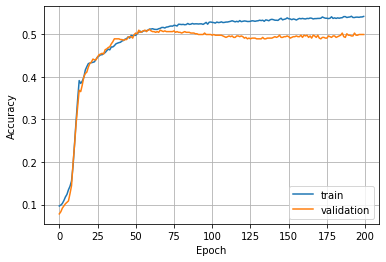

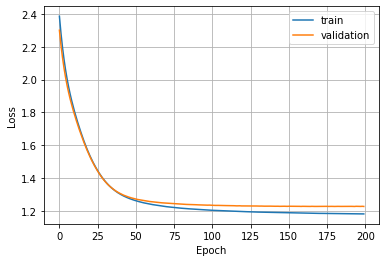

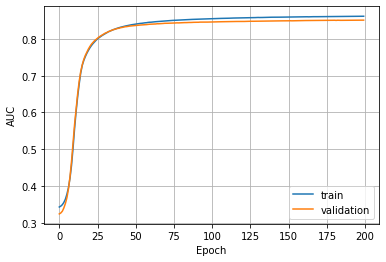

In [52]:
"""
Plot decision flow training process
"""
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['train', 'validation'])
plt.grid()
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train', 'validation'])
plt.grid()
plt.show()

plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend(['train', 'validation'])
plt.grid()
plt.show()

In [54]:
"""
Calcualte quadratic kappa for decision flow
"""
yhat = model.predict(test_DF_x)
yhat = np.argmax(yhat, axis=1)
print("Quadratic weighted kappa (decision flow):", quadratic_kappa(np.argmax(test_y, axis=1), yhat, 6))

0.7164372584100265


In [60]:
"""
Create and compile a new model
"""
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, input_shape=(5,)),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(6, activation="softmax")
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002),
    loss="categorical_crossentropy",
    metrics=['accuracy', 'AUC']
)

In [61]:
"""
Train with multi-class data
"""
history = model.fit(x=train_MC_x, y=train_y, epochs=200, validation_data=(validation_MC_x, validation_y), shuffle=True, callbacks=[es])
model.evaluate(test_MC_x, test_y)

Epoch 1/200
74/74 [==============================] - 1s 7ms/step - loss: 1.9202 - accuracy: 0.1141 - auc: 0.5093 - val_loss: 1.8701 - val_accuracy: 0.1222 - val_auc: 0.5429
Epoch 2/200
74/74 [==============================] - 0s 3ms/step - loss: 1.8741 - accuracy: 0.1155 - auc: 0.5353 - val_loss: 1.8227 - val_accuracy: 0.1104 - val_auc: 0.5717
Epoch 3/200
74/74 [==============================] - 0s 3ms/step - loss: 1.8166 - accuracy: 0.1708 - auc: 0.5705 - val_loss: 1.7801 - val_accuracy: 0.3107 - val_auc: 0.5973
Epoch 4/200
74/74 [==============================] - 0s 3ms/step - loss: 1.7671 - accuracy: 0.3297 - auc: 0.6050 - val_loss: 1.7416 - val_accuracy: 0.3158 - val_auc: 0.6160
Epoch 5/200
74/74 [==============================] - 0s 3ms/step - loss: 1.7525 - accuracy: 0.3122 - auc: 0.6065 - val_loss: 1.7065 - val_accuracy: 0.3209 - val_auc: 0.6331
Epoch 6/200
74/74 [==============================] - 0s 3ms/step - loss: 1.7049 - accuracy: 0.3307 - auc: 0.6310 - val_loss: 1.6736 - v

[1.156435489654541, 0.5412044525146484, 0.8669657707214355]

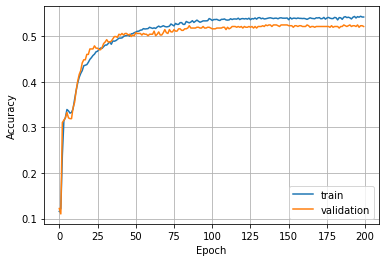

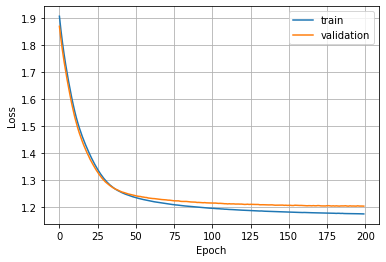

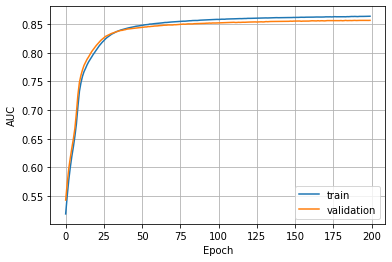

In [62]:
"""
Plot multi-class training process
"""
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['train', 'validation'])
plt.grid()
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train', 'validation'])
plt.grid()
plt.show()

plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend(['train', 'validation'])
plt.grid()
plt.show()

In [67]:
"""
Calcualte quadratic kappa for multi-class
"""
yhat = model.predict(test_MC_x)
yhat = np.argmax(yhat, axis=1)
print("Quadratic weighted kappa (multi-class):", quadratic_kappa(np.argmax(test_y, axis=1), yhat, 6))

Quadratic weighted kappa (multi-class): 0.7003573621350303
